In [86]:
%matplotlib inline

In [87]:
import numpy as np
import pickle as pk
from ipywidgets import interact
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [88]:
labels =  ['CR', 'PL', 'SP', 'PO', 'TU', 'GE', 'BG', 'TH', 'CH', 'FR', 'CZ', '203', '101', 'N', '404', '402', '307', '206', '107', '103']
langs = ['CR', 'PL', 'SP', 'PO', 'TU', 'GE', 'BG', 'TH', 'CH', 'FR', 'CZ', '203 (Lao)', '101 (Cantonese)', '505 (Dutch)', '404 (Georgian)', '402 (Javanese)', '307 (Amharic)', '206 (Zulu)', '107 (Vietnamese)', '103 (Bengali)']
families = [
    'South Slavic',
    'West Slavic',
    'Romance',
    'Romance',
    'Turkic',
    'Germanic',
    'South Slavic',
    'Tai',
    'Sinitic',
    'Romance',
    'West Slavic',
    'Tai',
    'Sinitic',
    'Germanic',
    'Kartvelian',
    'Austronesian',
    'Ethiopic',
    'Bantu',
    'Vietic',
    'Indo-Aryan'
]

In [9]:
label2lang = {ll: lang for ll, lang in zip(labels, langs)}

In [36]:
with open('lgcn_emb.pk', 'rb') as f:
    lembs, lang_labels = pk.load(f)

In [40]:
nep, nlang, embdim = lembs.shape

In [42]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
embs = tsne.fit_transform(lembs.reshape(-1, embdim))

In [44]:
tsneembs = embs.reshape(nep, nlang, 2)

In [ ]:
# Language embedding from GCN

In [82]:
colors = cm.rainbow(np.linspace(0, 1, len(lang_labels)))
@interact
def update(i=(0,nep-1)):
    lemb = tsneembs[i]
    x_dist = max(lemb[:,0]) - min(lemb[:,0])
    y_dist = max(lemb[:,1]) - min(lemb[:,1])
    
    plt.figure(figsize=(20,15))
    plt.scatter(lemb[:,0], lemb[:,1], color=colors, s=10*y_dist)
    
    for le, ll, f in zip(lemb, lang_labels, families):
        plt.text(le[0], le[1]+0.001*x_dist, label2lang[ll].replace(' ', '\n'))
        plt.text(le[0]-0.015*x_dist, le[1]-0.015*y_dist, f, rotation=270)

interactive(children=(IntSlider(value=4, description='i', max=8), Output()), _dom_classes=('widget-interact',)…

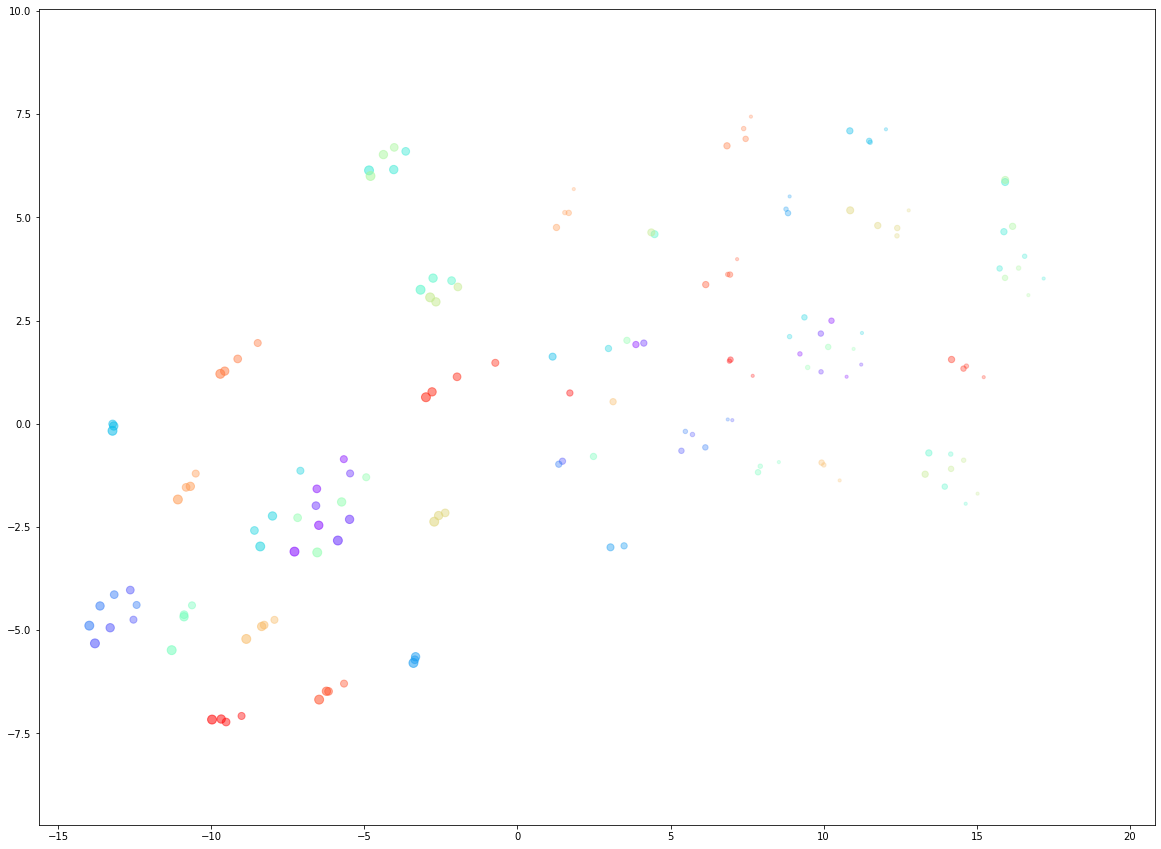

In [66]:
colors = cm.rainbow(np.linspace(0, 1, len(lang_labels)))
# for y in ys:
#     plt.scatter(x, y, color=next(colors))
alphas = np.linspace(0.2,1,len(lang_labels))
plt.figure(figsize=(20,15))
for i, lemb in enumerate(tsneembs):
    plt.scatter(lemb[:,0], lemb[:,1], color=colors, alpha=alphas[i], s=i*10)

# lemb

In [84]:
with open('lemb_emb.pk', 'rb') as f:
    lembs_lemb, lang_labels = pk.load(f)
nep, nlang, embdim = lembs_lemb.shape
from sklearn.manifold import TSNE
tsne_lemb = TSNE(n_components=2, init='pca', random_state=0)
tsneembs_lemb = tsne_lemb.fit_transform(lembs_lemb.reshape(-1, embdim))
tsneembs_lemb = tsneembs_lemb.reshape(nep, nlang, 2)

In [85]:
colors = cm.rainbow(np.linspace(0, 1, len(lang_labels)))
@interact
def update(i=(0,nep-1)):
    lemb = tsneembs_lemb[i]
    x_dist = max(lemb[:,0]) - min(lemb[:,0])
    y_dist = max(lemb[:,1]) - min(lemb[:,1])
    
    plt.figure(figsize=(20,15))
    plt.scatter(lemb[:,0], lemb[:,1], color=colors, s=10*y_dist)
    
    for le, ll, f in zip(lemb, lang_labels, families):
        plt.text(le[0], le[1]+0.001*x_dist, label2lang[ll].replace(' ', '\n'))
        plt.text(le[0]-0.015*x_dist, le[1]-0.015*y_dist, f, rotation=270)

interactive(children=(IntSlider(value=4, description='i', max=8), Output()), _dom_classes=('widget-interact',)…